In [ ]:
#################Importação das Bibliotecas#########################

In [1]:
############importação de biblioteca para análise de dados e manipulação############
import numpy as np
import pandas as pd
###############Importação da bibliotecas para gráficos##############################
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
################Importação das bibliotecas do Modelo de Machine Learning################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
#######################Carregando dados###############################
##########Dados queimadas - Para os Estados da Amazônia Legal######
url_areas_queimadas = 'https://drive.google.com/file/d/1vRVra-yLlZxknweY-6YIQQJjWCqK75mT/view?usp=sharing'
url_areas_queimadas='https://drive.google.com/uc?id=' + url_areas_queimadas.split('/')[-2]
tabela_areas_queimadas = pd.read_csv(url_areas_queimadas)
##########Dados queimadas - Para os Outros Estados##########
url_queimadas_mais_estados = 'https://drive.google.com/file/d/1VdFxMxEWzUuqYLTfv2grmFD2tDRdOez-/view?usp=sharing'
url_queimadas_mais_estados='https://drive.google.com/uc?id=' + url_queimadas_mais_estados.split('/')[-2]
tabela_areas_queimadas_mais_estados = pd.read_csv(url_queimadas_mais_estados,encoding='latin-1')
##########Dados sobre Desmatamento - Amazônia Legal##########
url_areas_desmatadas = 'https://drive.google.com/file/d/1gF9JQPHV7dbviqLl8Z-MY_C8iyF1OREd/view?usp=sharing'
url_areas_desmatadas='https://drive.google.com/uc?id=' + url_areas_desmatadas.split('/')[-2]
tabela_areas_desmatadas = pd.read_csv(url_areas_desmatadas,encoding='latin-1')

In [3]:
#############Analises dos Dataframes##############################

In [4]:
#listar detalhes do dataframe
tabela_areas_desmatadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ï»¿Ano/Estados  16 non-null     int64
 1   AC              16 non-null     int64
 2   AM              16 non-null     int64
 3   AP              16 non-null     int64
 4   MA              16 non-null     int64
 5   MT              16 non-null     int64
 6   PA              16 non-null     int64
 7   RO              16 non-null     int64
 8   RR              16 non-null     int64
 9   TO              16 non-null     int64
 10  AMZ LEGAL       16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB


In [5]:
#Verificar tamanho da base
tabela_areas_desmatadas.shape

(16, 11)

In [6]:
#Verificar as colunas
tabela_areas_desmatadas.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [7]:
#Verificar informações sobre a base
tabela_areas_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [8]:
#Verificar o tamanho da base
tabela_areas_queimadas.shape

(2104, 6)

In [9]:
#Verificar as colunas da base
tabela_areas_queimadas.columns

Index(['year', 'month', 'state', 'latitude', 'longitude', 'firespots'], dtype='object')

In [10]:
#Verificar informações sobre a base
tabela_areas_queimadas_mais_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [11]:
#Verificar o tamanho da base
tabela_areas_queimadas_mais_estados.shape

(6454, 5)

In [12]:
#Verificar as colunas da base
tabela_areas_queimadas_mais_estados.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [13]:
#Verificar a estrutura do conjunto de áreas queimadas para mais estados
tabela_areas_queimadas_mais_estados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [14]:
#Verificar a estrutura do conjunto de áreas desmatadas
tabela_areas_desmatadas.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [15]:
#Verificar a estrutura do conjunto de áreas desmatadas
tabela_areas_queimadas.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [16]:
#############Verificar se tem nulos ou valores não identificados nos conjuntos

In [17]:
#identificar valores nulos e somar no conjunto áreas desmatadas
tabela_areas_desmatadas.isnull().sum()

ï»¿Ano/Estados    0
AC                0
AM                0
AP                0
MA                0
MT                0
PA                0
RO                0
RR                0
TO                0
AMZ LEGAL         0
dtype: int64

In [18]:
#identificar valores nulos e somar no conjunto sobre queimadas para a Amazônia Legal
tabela_areas_queimadas.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

In [19]:
#identificar valores nulos e somar no conjunto sobre queimadas para outros estados 
tabela_areas_queimadas_mais_estados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [20]:
#Pesquisar se existe NAN no conjunto áreas desmatamadas na Amazônia Legal
np.isnan(tabela_areas_desmatadas)

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [21]:
#Pesquisar se existe NAN no conjunto queimadas para Amazônia Legal
np.isnan(tabela_areas_queimadas[['year','month','latitude','latitude','latitude']]).any()

year        False
month       False
latitude    False
latitude    False
latitude    False
dtype: bool

In [22]:
#Pesquisar se existe NAN no conjunto queimadas para Mais Estados
np.isnan(tabela_areas_queimadas_mais_estados[['year','number']]).any()

year      False
number    False
dtype: bool

In [23]:
#Verificar duplicados no dataframe de áreas desmatadas
tabela_areas_desmatadas.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [24]:
#Verificar duplicados no dataframe de áreas queimadas
tabela_areas_queimadas.duplicated().any()

False

In [25]:
#Verificar duplicados no dataframe de áreas queimadas mais estados
tabela_areas_queimadas_mais_estados.duplicated().any()

True

In [26]:
#Remover duplicidade de áreas queimadas mais estados
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.drop_duplicates()

In [27]:
#Verificar novamente se existe duplicidade no dataframe de áreas queimadas mais estados
tabela_areas_queimadas_mais_estados.duplicated().any()

False

In [28]:
########################Ajustes dos dados e criação de novos conjuntos#####################################

In [29]:
#### criação da base sobre queimadas que será utilizada no modelo e análises

In [30]:
#Primeira etapa: Alterações dos nomes para o dataframe queimadas da Amazônia Legal
tabela_areas_queimadas = tabela_areas_queimadas.rename(columns= {'year':'Anos', 'month':'mês','firespots':'qtd. focos de incêndio','state':'estados'})

In [31]:
#Segunda etapa: Verificar estrutura após troca de nomes
tabela_areas_queimadas.tail()

,Anos,mês,estados,latitude,longitude,qtd. focos de incêndio
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27
2103,2019,12,TOCANTINS,-6.769381,-48.475667,21


In [32]:
#Terceira Etapa: Alteração dos nomes para o conjunto de dados sobre queimadas nos demais estados
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.rename(columns= {'year':'Anos', 'month':'mês','number':'qtd. focos de incêndio','state':'estados'})

In [33]:
#Quarta Etapa: Criação de dataframe sem latitude e longitude para junção com o anterior  para queimadas nos estados AMZ
tabelas_areas_queimadas_sem_lat_e_long = tabela_areas_queimadas[['Anos','mês', 'estados','qtd. focos de incêndio']]

In [34]:
#Quinta estapa : Agrupamento por Ano, mês e estado do dados sobre Estados Gerais
tabelas_areas_queimadas_sem_lat_e_long_amz = tabelas_areas_queimadas_sem_lat_e_long.groupby(['Anos','mês','estados']).sum().reset_index()

In [35]:
#Sexta Etapa: Agrupamento por Ano, mês e estado do dados sobre queimadas nos outros estados
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.groupby(['Anos','mês','estados']).sum().reset_index()

In [36]:
### Sétima Etapa: Mudar os meses do conjunto de queimadas para estados para númerico, com o objetivo de trabalhar no modelo
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Janeiro",'mês'] = 1
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Fevereiro",'mês'] = 2
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Março",'mês'] = 3
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Abril",'mês'] = 4
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Maio",'mês'] = 5
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Junho",'mês'] = 6
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Julho",'mês'] = 7
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Agosto",'mês'] = 8
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Setembro",'mês'] = 9
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Outubro",'mês'] = 10
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Novembro",'mês'] =11
tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados['mês']=="Dezembro",'mês'] = 12

In [37]:
### Oitava Etapa: Excluir registros do conjunto mais estados, e deixar somente Estados que não sejam da Amazônia Legal para não ter duplicidade
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.query("not(estados== 'Acre') and not(estados== 'Amapa') and not(estados== 'Amazonas') and not(estados== 'Mato Grosso') and not(estados== 'Para') and not(estados== 'Rondonia') and not(estados== 'Roraima') and not(estados== 'Tocantins') and not(estados== 'Pará')and not(estados== 'Maranhao')")

In [38]:
#Nona Etapa: Criação do conjunto que será utilizado no novo dataframe
conjunto_queimadas = [tabelas_areas_queimadas_sem_lat_e_long_amz, tabela_areas_queimadas_mais_estados]

In [39]:
##Décima Etapa: Concatenar os conjuntos para criação do novo conjunto sobre queimadas
resultado_queimadas = pd.concat(conjunto_queimadas)

In [40]:
##Décima Primeira Etapa: Agrupamento para Ano, mês e estados, para somar os valores por essas colunas citadas
resultado_queimadas_group_by = resultado_queimadas.groupby(['Anos','mês','estados']).sum().reset_index()


In [41]:
##########Décima Segunda Etapa: Criação de Colunas para os estados, para auxiliar na execução do modelo
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="AMAZONAS",'AM - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']

In [42]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="MARANHAO",'MA - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="ACRE",'AC - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="AMAPA",'AP - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="MATO GROSSO",'MT - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="PARA",'PA - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="RONDONIA",'RO - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="RORAIMA",'RR - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="TOCANTINS",'TO - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']

In [43]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Alagoas",'AL - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Bahia",'BA - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']


In [44]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Ceara",'CE - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Distrito Federal",'DF - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']


In [45]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Espirito Santo",'ES - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Goias",'GO - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']


In [46]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Minas Gerais",'MG - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Paraiba",'PA - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']


In [47]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Pernambuco",'PE - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']



In [48]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Rio",'RJ - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Santa Catarina",'PI - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']

resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Sao Paulo",'SC - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']


In [49]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Piaui",'PI - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']

In [50]:
resultado_queimadas_group_by.loc[resultado_queimadas_group_by['estados']=="Sergipe",'SE - qtd. focos de incêndio']=resultado_queimadas_group_by['qtd. focos de incêndio']



In [51]:
### Décima Terceira Etapa: Análise após ajustes
resultado_queimadas_group_by.columns

Index(['Anos', 'mês', 'estados', 'qtd. focos de incêndio',
       'AM - qtd. focos de incêndio', 'MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio'],
      dtype='object')

In [52]:
####Décima Quarta Etapa: Excluir as colunas estados e qtd. focos de incêndio, pois não serão utilizadas
df_queimadas_group_by = resultado_queimadas_group_by.drop(['estados','qtd. focos de incêndio'],axis=1) 

In [53]:
### Décima Quinta Etapa: Agrupar por anos e mês o novo dataframe
df_queimadas_group_by = df_queimadas_group_by.groupby(['Anos','mês']).sum().reset_index()

In [54]:
###Décima Sexta Etapa: Criação da coluna de somatório de queimadas
colunas = ['AM - qtd. focos de incêndio',
       'MA - qtd. focos de incêndio', 'AC - qtd. focos de incêndio',
       'AP - qtd. focos de incêndio', 'MT - qtd. focos de incêndio',
       'PA - qtd. focos de incêndio', 'RO - qtd. focos de incêndio',
       'RR - qtd. focos de incêndio', 'TO - qtd. focos de incêndio',
       'AL - qtd. focos de incêndio', 'BA - qtd. focos de incêndio',
       'CE - qtd. focos de incêndio', 'DF - qtd. focos de incêndio',
       'ES - qtd. focos de incêndio', 'GO - qtd. focos de incêndio',
       'MG - qtd. focos de incêndio', 'PE - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'SC - qtd. focos de incêndio', 'SE - qtd. focos de incêndio']

In [55]:
###Décima Sétima Etapa: Somatório das colunas citadas anteriormente
df_queimadas_group_by["somatorio_queimadas_ano_mes"] = df_queimadas_group_by[colunas].sum(axis=1)

In [56]:
###Décima Oitava Etapa: Criação de dataframe sem mês - Aviso: Será usado para o relatório no power bi e no modelo
df_queimadas_group_by_sem_mes = df_queimadas_group_by.drop(['mês'],axis=1) 

In [57]:
###Décima Nona Etapa: Criação de dataframe sem mês - Aviso: Será usado para análises nos gráficos
df_queimadas_group_by_sem_ano = df_queimadas_group_by.drop(['Anos'],axis=1) 

In [58]:
###Vigésima Etapa: Agrupamento dos dataframes criados anteriormente
df_queimadas_group_by_sem_mes = df_queimadas_group_by_sem_mes.groupby(['Anos']).sum().reset_index()

In [59]:
df_queimadas_group_by_sem_ano = df_queimadas_group_by_sem_ano.groupby(['mês']).sum().reset_index()

In [60]:
######################## criação da base sobre queimadas que será utilizado para análise no power bi


In [61]:
###1 - Verificar o nome das colunas 
tabela_areas_desmatadas.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [62]:
### 2 - renomear as colunas

In [63]:
tabela_areas_desmatadas = tabela_areas_desmatadas.rename(columns = {'ï»¿Ano/Estados':'Anos','AC':'AC - Área desmatada (km²)','AM':'AM - Área desmatada (km²)','AP':'AP - Área desmatada (km²)',
                                                   'MA':'MA - Área desmatada (km²)', 'MT':'MT - Área desmatada (km²)','PA':'PA - Área desmatada (km²)',
                                                  'RO':'RO - Área desmatada (km²)', 'RR':'RR - Área desmatada (km²)','TO':'TO - Área desmatada (km²)',
                                                   'AMZ LEGAL':'AMZ LEGAL - Área desmatada (km²)'
                                                  })

In [65]:
#### 3 - criação de index para o conjunto desmatadas
tabela_areas_desmatadas.set_index('Anos',inplace = True)

In [68]:
#### 4 -  Criação do novo conjunto de dados
df_desmatadas_queimadas = pd.DataFrame.merge(tabela_areas_desmatadas,df_queimadas_group_by_sem_mes,on='Anos')

In [69]:
### 5 - Criação de index do novo dataframe
df_desmatadas_queimadas.set_index('Anos',inplace = True)

In [104]:
###6 - Exportar arquivo para ser usado no power bi
df_desmatadas_queimadas.to_csv("df_desmatadas_queimadas.csv",index=True)



In [77]:
##7 - Criação de index para análises para o dataframe queimadas
df_queimadas_group_by_sem_mes.set_index('Anos',inplace = True)

In [78]:
#####################Criação dos gráficos para análise



Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019


Text(0.5, 0, 'Anos')

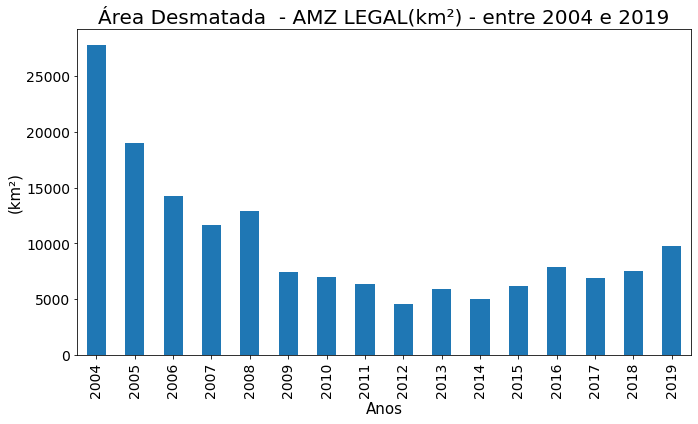

In [74]:
###Análise da área desmatada na Amazônia Legal
print("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019")
grafico_barras_amz = tabela_areas_desmatadas['AMZ LEGAL - Área desmatada (km²)'].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019", fontsize = 20)
grafico_barras_amz.set_ylabel("(km²)",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Focos de Incêndio - 2004


Text(0.5, 0, 'Qtd. focos de incêndio')

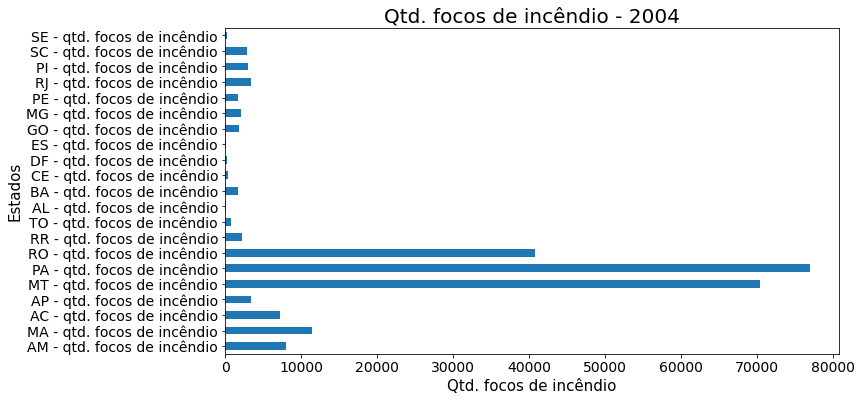

In [82]:
##############Análise para os focos de queimadas para o ano com maior índice de desmatamento
print("Quantidade de Focos de Incêndio - 2004")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[2004].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2004", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2005,2006


Text(0.5, 0, 'Qtd. focos de incêndio')

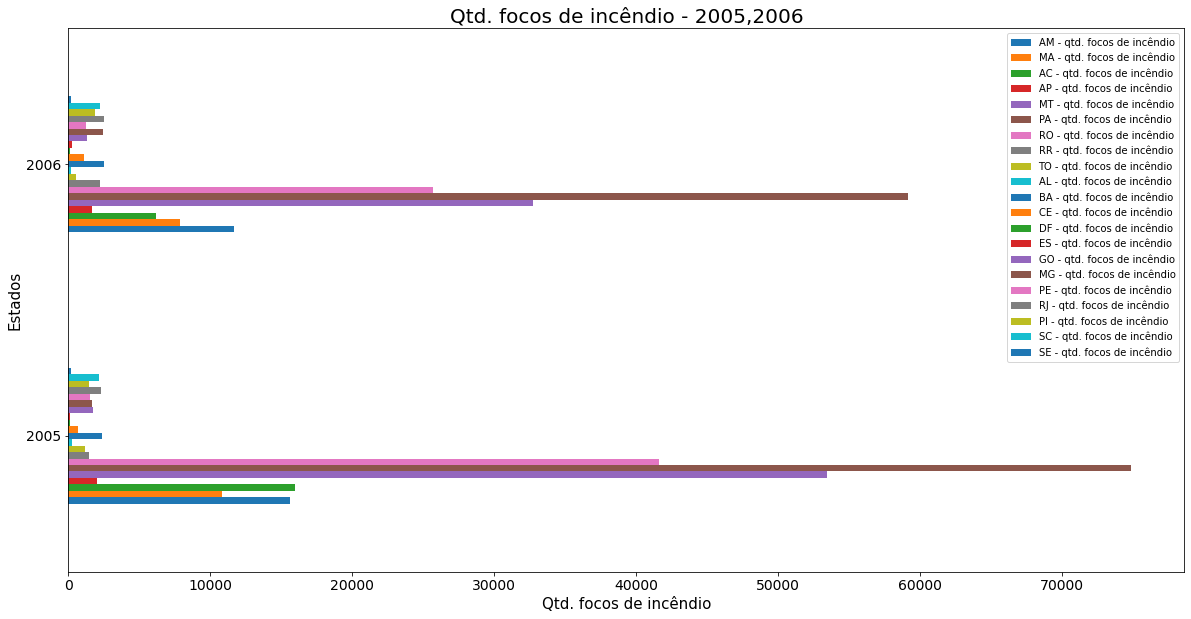

In [91]:
##############Análise para os focos de queimadas no ano 2005 e 2006
print("Quantidade de Focos de Incêndio - 2005,2006")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2005,2006]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2005,2006", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2007,2008


Text(0.5, 0, 'Qtd. focos de incêndio')

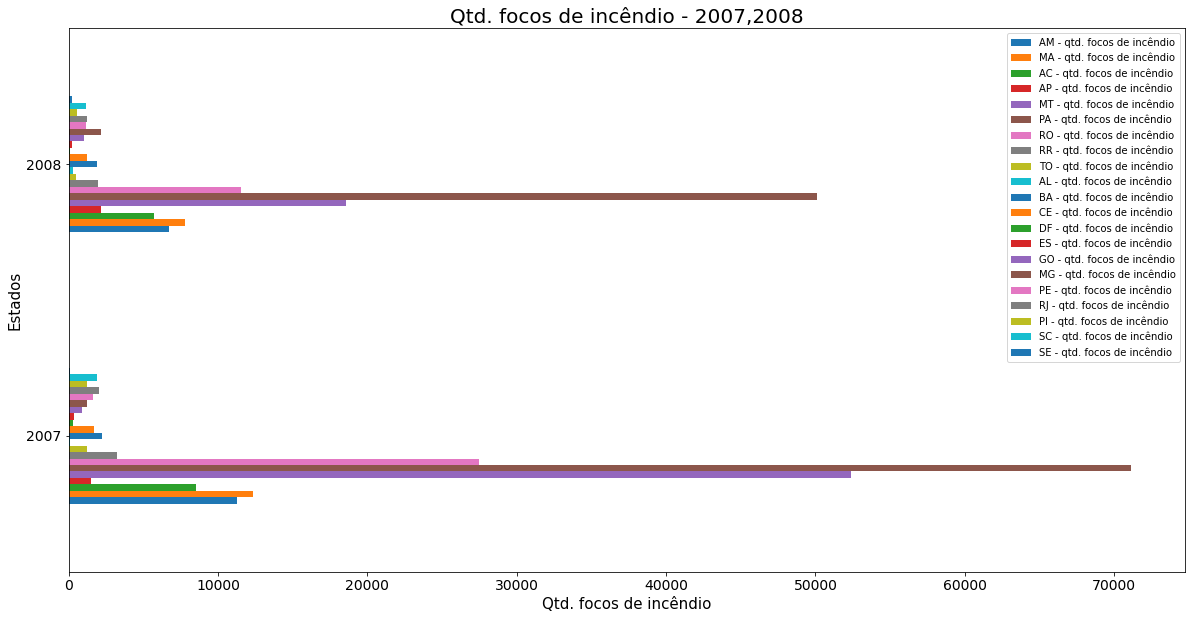

In [92]:
##############Análise para os focos de queimadas no ano 2007 e 2008
print("Quantidade de Focos de Incêndio - 2007,2008")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2007,2008]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2007,2008", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2008,2009


Text(0.5, 0, 'Qtd. focos de incêndio')

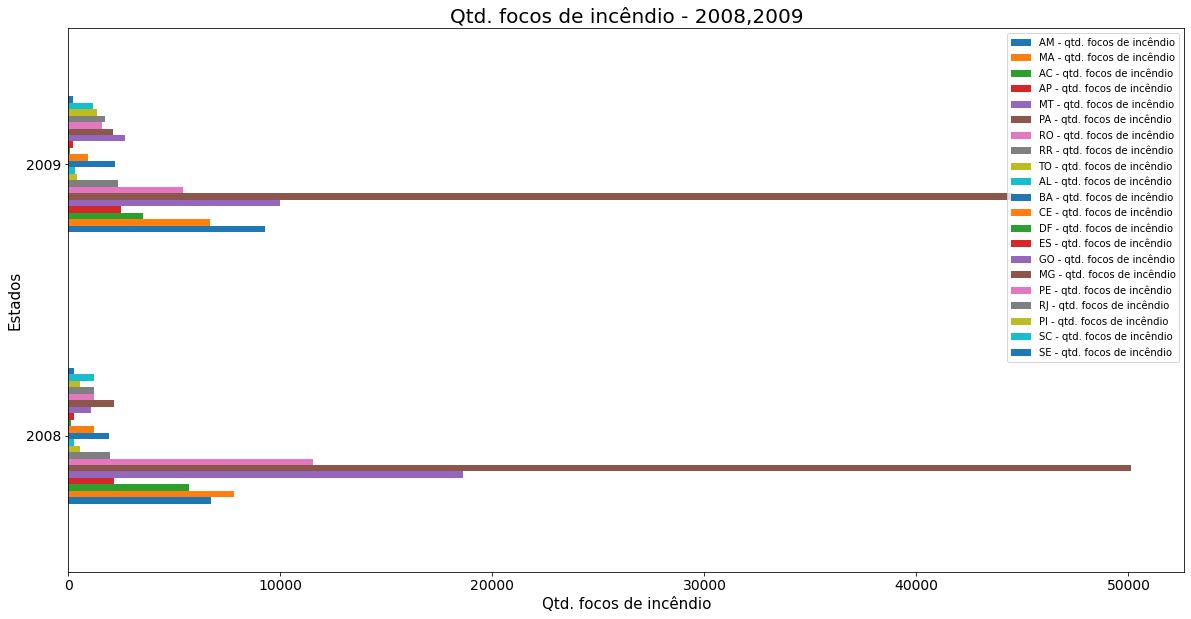

In [93]:
##############Análise para os focos de queimadas no ano 2008 e 2009
print("Quantidade de Focos de Incêndio - 2008,2009")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2008,2009]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2008,2009", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2010,2011


Text(0.5, 0, 'Qtd. focos de incêndio')

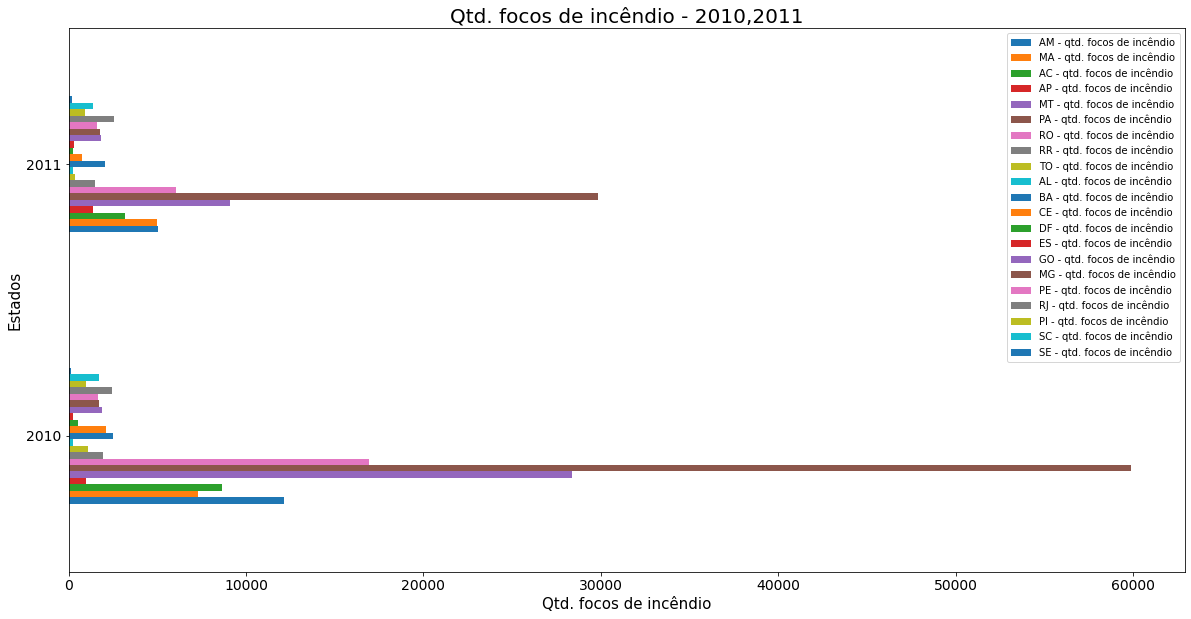

In [94]:
##############Análise para os focos de queimadas no ano 2010 e 2011
print("Quantidade de Focos de Incêndio - 2010,2011")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2010,2011]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2010,2011", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2011,2012


Text(0.5, 0, 'Qtd. focos de incêndio')

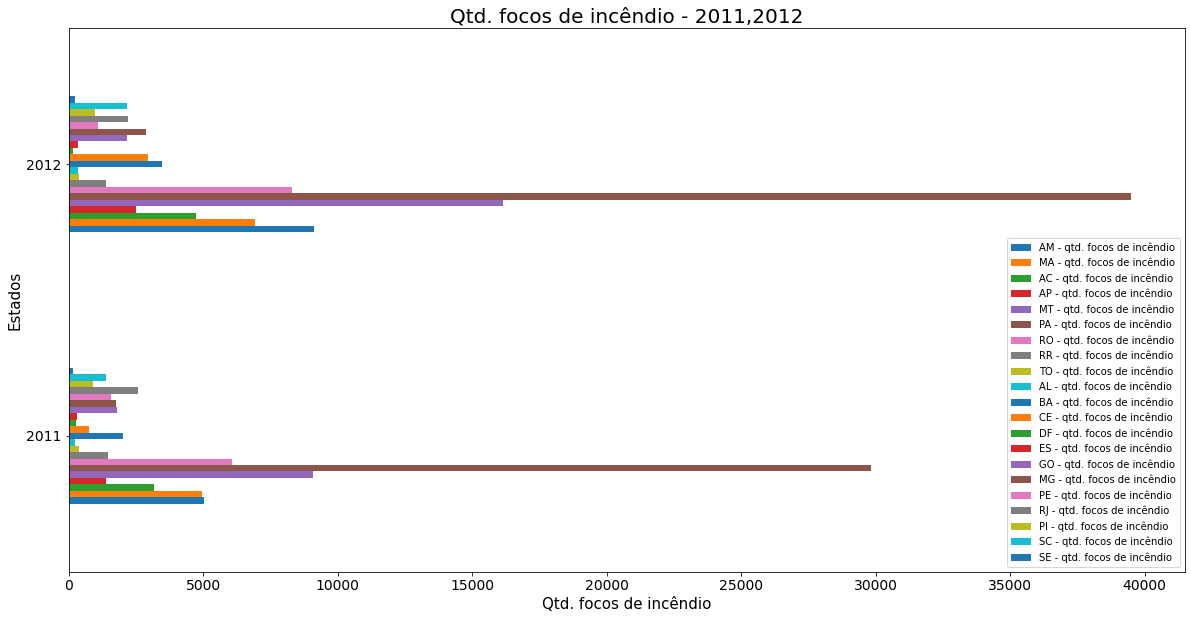

In [95]:
##############Análise para os focos de queimadas no ano 2011 e 2012
print("Quantidade de Focos de Incêndio - 2011,2012")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2011,2012]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2011,2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2012,2013


Text(0.5, 0, 'Qtd. focos de incêndio')

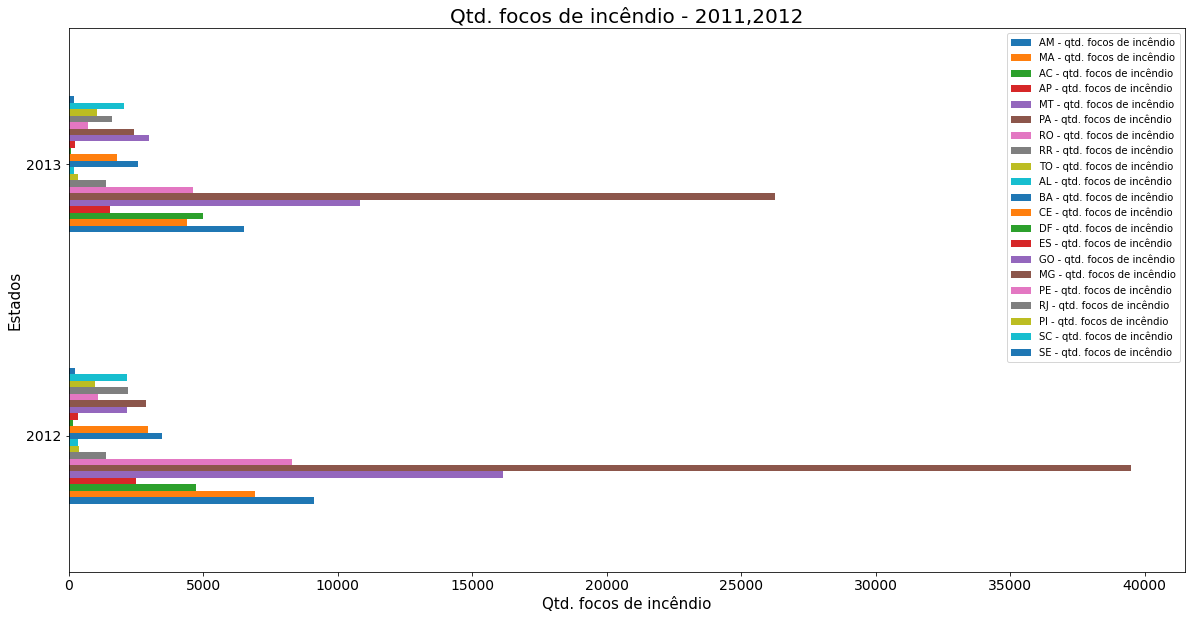

In [96]:
##############Análise para os focos de queimadas no ano 2012 e 2013
print("Quantidade de Focos de Incêndio - 2012,2013")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2012,2013]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2011,2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2014,2015


Text(0.5, 0, 'Qtd. focos de incêndio')

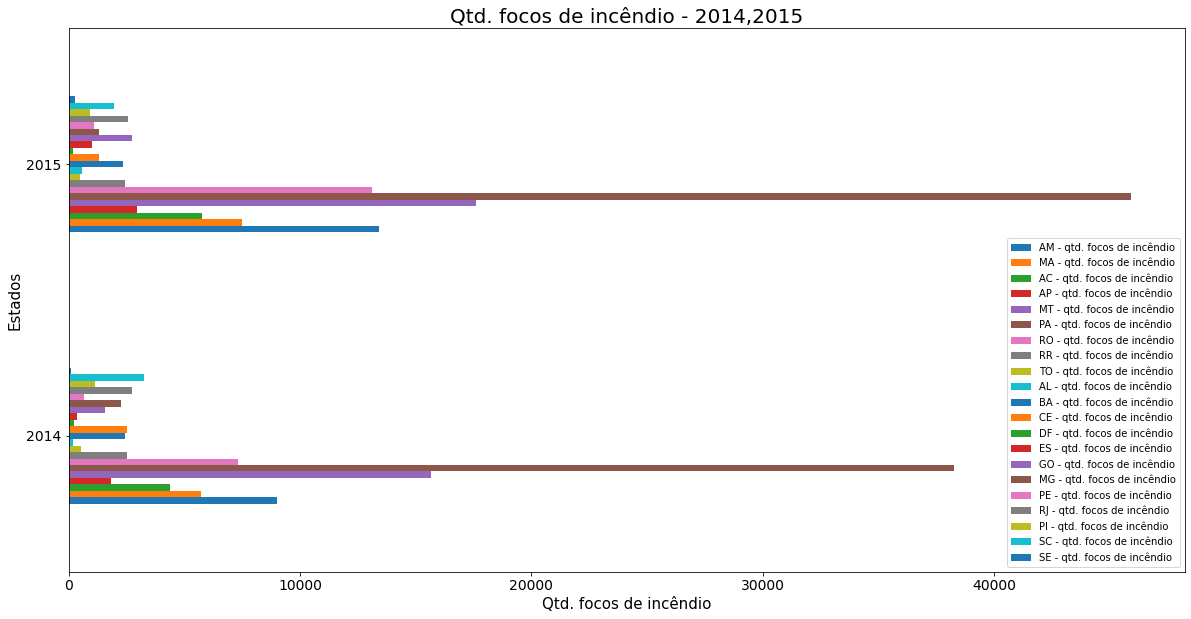

In [97]:
##############Análise para os focos de queimadas no ano 2014 e 2015
print("Quantidade de Focos de Incêndio - 2014,2015")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2014,2015]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2014,2015", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2015,2016


Text(0.5, 0, 'Qtd. focos de incêndio')

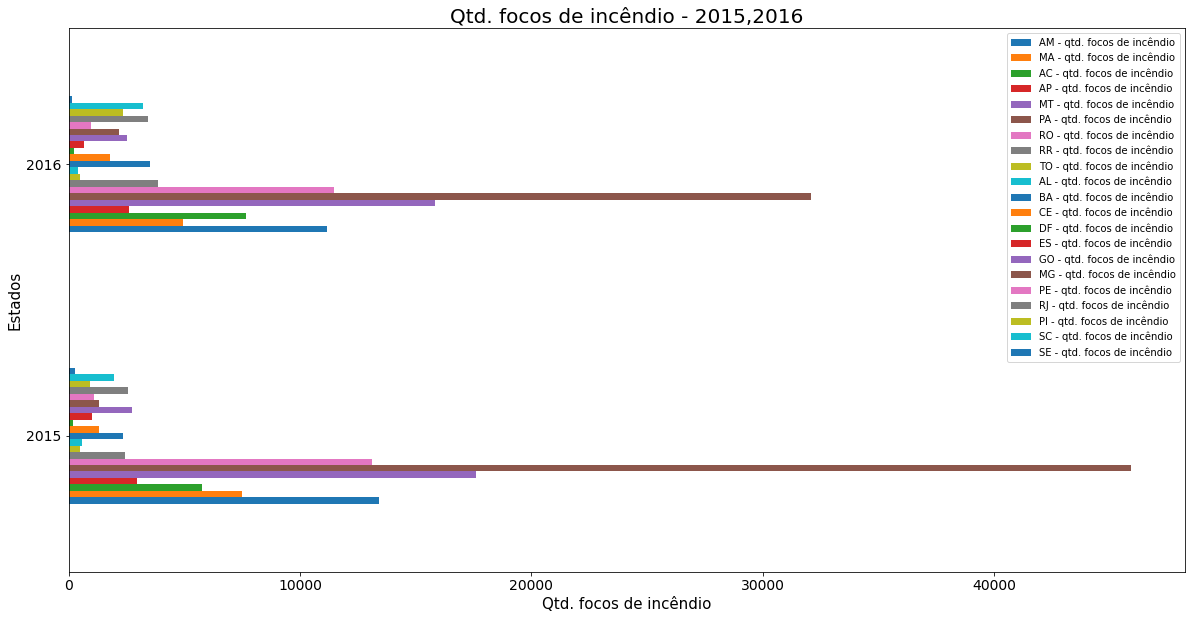

In [98]:
##############Análise para os focos de queimadas no ano 2015 e 2016
print("Quantidade de Focos de Incêndio - 2015,2016")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2015,2016]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2015,2016", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2016,2017


Text(0.5, 0, 'Qtd. focos de incêndio')

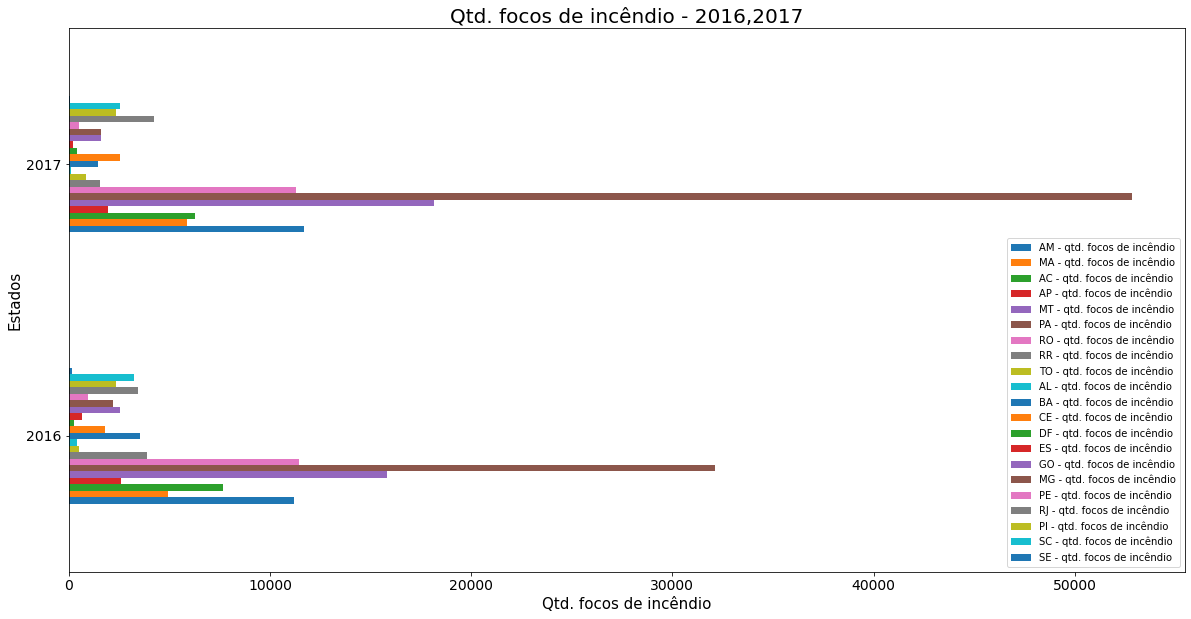

In [99]:
##############Análise para os focos de queimadas no ano 2016 e 2017
print("Quantidade de Focos de Incêndio - 2016,2017")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2016,2017]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2016,2017", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2018,2019


Text(0.5, 0, 'Qtd. focos de incêndio')

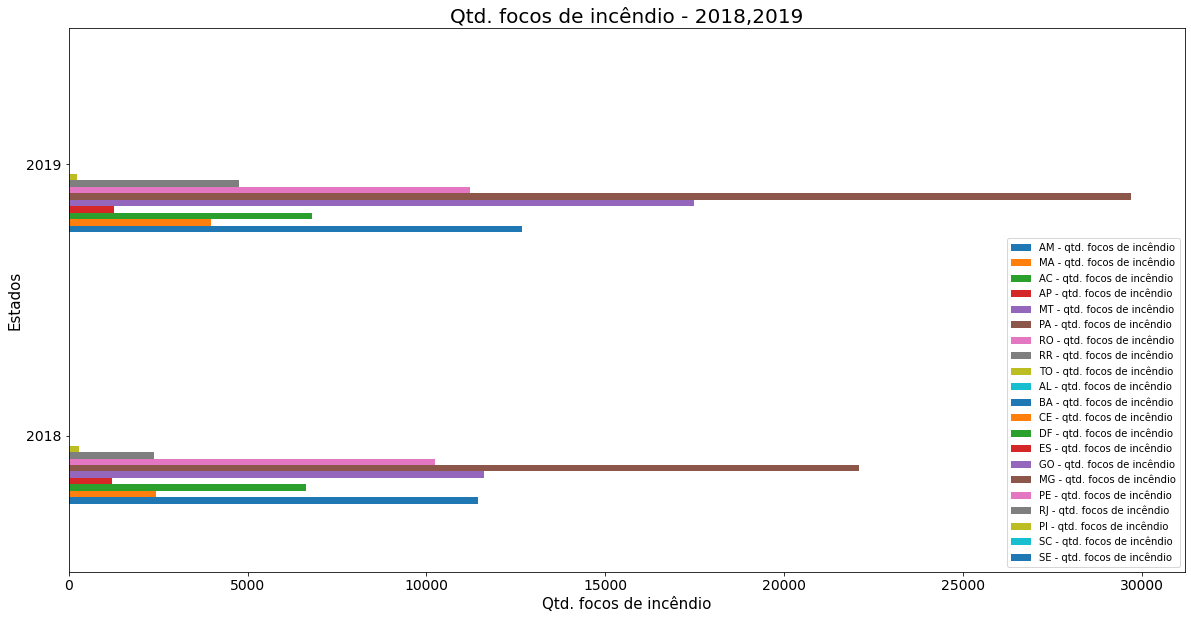

In [103]:
##############Análise para os focos de queimadas no ano 2018 e 2019
print("Quantidade de Focos de Incêndio - 2018,2019")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2018,2019]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2018,2019", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

In [ ]:
#####################################Análises e criação do modelo###################################

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'AM - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'MA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AC - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AP - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'MT - qtd. focos de incêndio'}>],
       [<AxesSubplot:title={'center':'PA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'RO - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'RR - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'TO - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AL - qtd. focos de incêndio'}>],
       [<AxesSubplot:title={'center':'BA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'CE - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'DF - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'ES - qtd. focos de incêndio'}>,
        <AxesSubpl

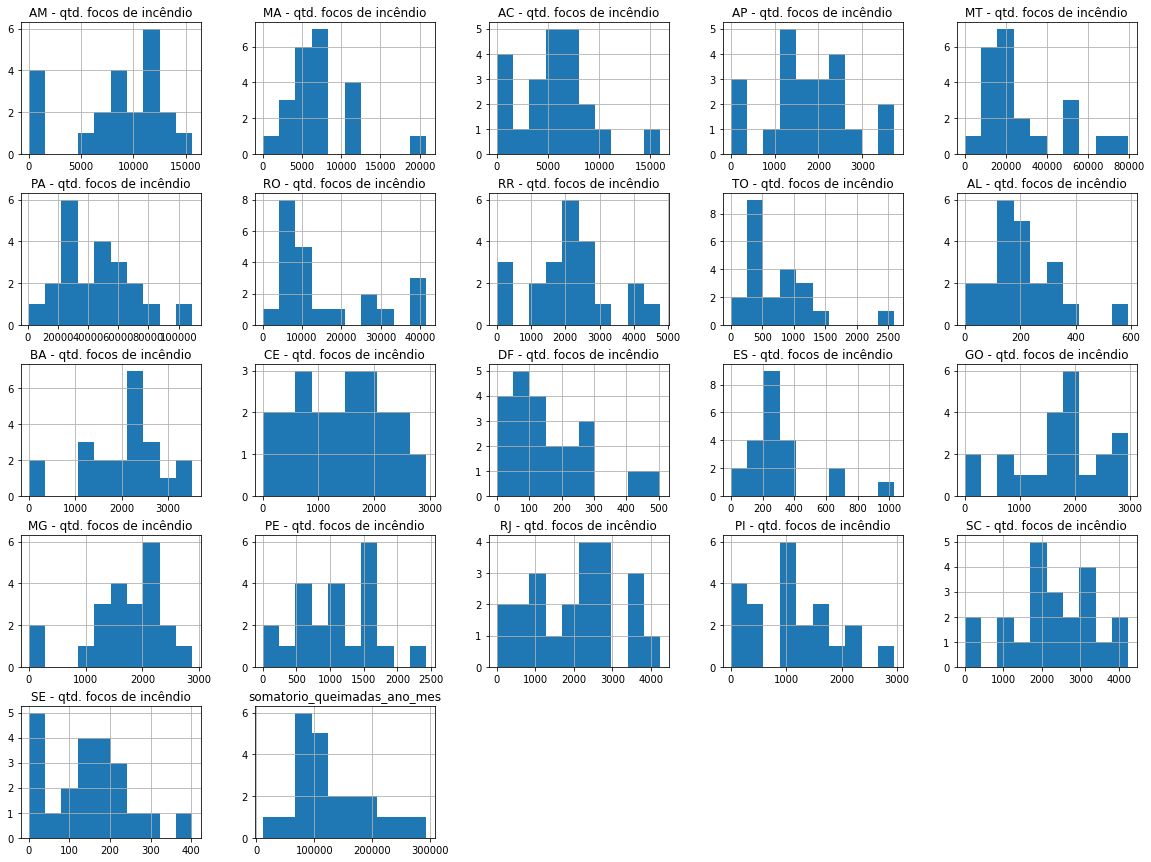

In [106]:
#Análise da discrepância dos valores de variáveis
fig = plt.figure(figsize = (20,15))
ax = fig.gca()

df_queimadas_group_by_sem_mes.hist(bins=10,ax=ax)

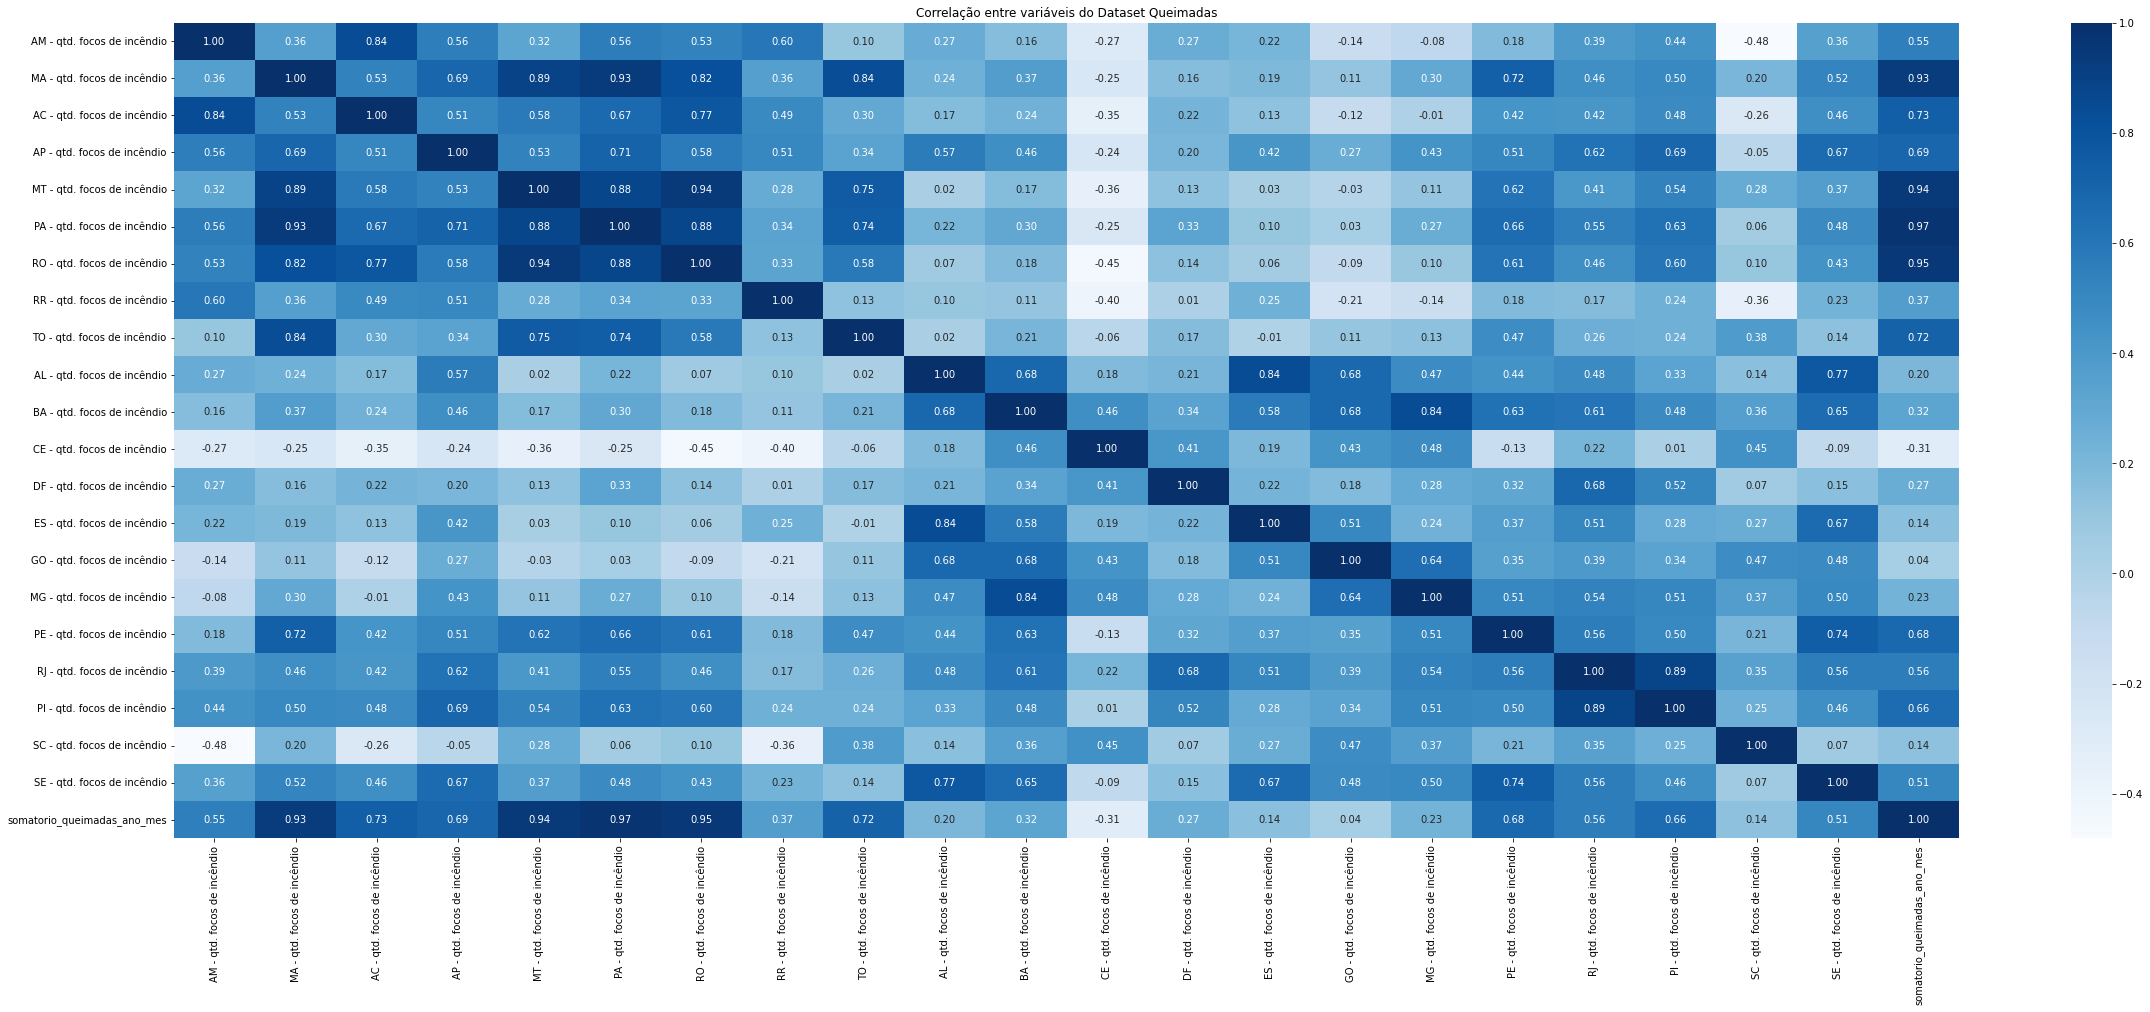

In [107]:
#buscando correlacionamento
fig = plt.figure(figsize = (40,15))
ax = fig.gca()
sns.heatmap(df_queimadas_group_by_sem_mes.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues',ax=ax)
plt.title('Correlação entre variáveis do Dataset Queimadas')
plt.show()

In [108]:
#Separa features(matriz X:colunas usadas para fazer a predição) de target (coluna y:coluna se quer prever)
target = "somatorio_queimadas_ano_mes"
#target2 = "Anos"
X = df_queimadas_group_by_sem_mes.drop([target], axis=1)
y = df_queimadas_group_by_sem_mes[target]

In [109]:
X 

,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,RO - qtd. focos de incêndio,RR - qtd. focos de incêndio,TO - qtd. focos de incêndio,AL - qtd. focos de incêndio,...,CE - qtd. focos de incêndio,DF - qtd. focos de incêndio,ES - qtd. focos de incêndio,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,PI - qtd. focos de incêndio,SC - qtd. focos de incêndio,SE - qtd. focos de incêndio
Anos,,,,,,,,,,,,,,,,,,,,,
1998,0.0,0.0,0.0,0.0,0.0,816.000,0.0,0.0,0.0,86.0,...,1612.014,103.0,218.0,750.119,1233.074,767.0,1149.000,59.000,3196.000,20.0
1999,1048.0,4136.0,347.0,101.0,28538.0,23915.000,7121.0,220.0,869.0,172.0,...,1688.000,46.0,240.0,1910.096,997.239,463.0,1030.110,364.000,4249.211,93.0
2000,857.0,4500.0,430.0,253.0,17242.0,21005.000,5505.0,362.0,818.0,123.0,...,2211.000,48.0,175.0,2516.293,1493.034,691.0,650.000,306.000,4128.000,17.0
2001,1297.0,7979.0,829.0,1300.0,20795.0,30663.000,5062.0,2415.0,1408.0,86.0,...,1847.501,64.0,130.0,2065.863,2138.597,1080.0,840.000,200.000,2926.000,24.0
2002,10203.0,20848.0,7985.0,3730.0,79680.0,109097.664,39132.0,2845.0,2601.0,258.0,...,454.108,149.0,297.0,1619.315,1949.929,1909.0,2945.000,1715.000,3539.000,208.0
2003,10191.0,12036.0,10523.0,2516.0,50713.0,55836.570,30533.0,3987.0,861.0,299.0,...,795.524,96.0,708.0,2078.845,1824.437,2431.0,3438.419,1608.852,3306.000,403.0
2004,8083.0,11443.0,7271.0,3413.0,70422.0,76974.597,40824.0,2221.0,746.0,159.0,...,383.275,279.0,174.0,1798.738,2140.717,1683.0,3434.000,2955.000,2864.000,190.0
2005,15644.0,10820.0,15993.0,2020.0,53489.0,74904.000,41641.0,1461.0,1175.0,217.0,...,680.221,92.0,121.0,1709.058,1646.622,1520.0,2297.000,1483.000,2123.000,200.0
2006,11697.0,7885.0,6198.0,1665.0,32745.0,59148.000,25699.0,2189.0,504.0,161.0,...,1109.173,76.0,215.0,1294.463,2463.780,1268.0,2493.000,1855.000,2209.000,147.0


In [110]:
y

Anos
1998     11233.894
1999     78745.238
2000     64708.962
2001     85577.612
2002    293445.716
2003    197261.797
2004    239102.736
2005    231593.967
2006    163530.501
2007    202873.056
2008    116496.936
2009     99166.182
2010    153418.824
2011     75327.022
2012    108032.206
2013     76897.608
2014    102793.023
2015    125608.571
2016    111597.629
2017    128151.420
2018     68345.000
2019     88135.000
Name: somatorio_queimadas_ano_mes, dtype: float64

In [111]:
#Gera dados de teste e de treino
#train_test_split: separar a base de treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=0)


In [126]:
##################Regressão Linear#############################
#Define classificador utilizado e treina
classifier_lm = LinearRegression()
classifier_lm.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
##########Validação Cruzada para a Regressão Linear
kfold  = KFold(n_splits=2, shuffle=True) 

In [129]:
### Aplicação do Kfold no modelo de Regressão linear
lm_resultado = cross_val_score(classifier_lm, xTrain, yTrain, cv = kfold)

In [131]:
print("Linear Regression Mean (R^2): {0}\n".format(lm_resultado.mean()))

Linear Regression Mean (R^2): 0.9973735402685935



In [132]:
#Faz predicao com o modelo de teste
yPred = classifier.predict(xTest)

In [133]:
classifier.score(xTest, yTest)

0.9989373857857977

In [134]:
#Verificar a precisão do modelo
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]


In [135]:
#Ordenar a base de testes por ano
xTestSorted = xTest.sort_index(axis=0)
yTestSorted = [yTest[index] for index in xTestSorted.index]

In [136]:
xTest

,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,RO - qtd. focos de incêndio,RR - qtd. focos de incêndio,TO - qtd. focos de incêndio,AL - qtd. focos de incêndio,...,CE - qtd. focos de incêndio,DF - qtd. focos de incêndio,ES - qtd. focos de incêndio,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,PI - qtd. focos de incêndio,SC - qtd. focos de incêndio,SE - qtd. focos de incêndio
Anos,,,,,,,,,,,,,,,,,,,,,
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.000,10253.0,2383.0,281.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0
2008,6701.0,7822.0,5699.0,2153.0,18602.0,50138.000,11549.0,1950.0,528.0,277.0,...,1212.408,115.0,251.0,1059.486,2138.339,1189.0,1217.000,547.0,1193.000,243.0
2012,9114.0,6919.0,4720.0,2518.0,16133.0,39506.000,8312.0,1376.0,406.0,352.0,...,2937.104,173.0,352.0,2181.976,2879.189,1089.0,2219.000,1000.0,2159.000,231.0
2011,5028.0,4976.0,3191.0,1396.0,9103.0,29843.000,6078.0,1475.0,376.0,232.0,...,774.002,273.0,326.0,1808.872,1766.926,1589.0,2567.000,926.0,1400.175,173.0
1999,1048.0,4136.0,347.0,101.0,28538.0,23915.000,7121.0,220.0,869.0,172.0,...,1688.000,46.0,240.0,1910.096,997.239,463.0,1030.110,364.0,4249.211,93.0
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.000,11206.0,4775.0,247.0,0.0,...,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0
2009,9280.0,6664.0,3511.0,2456.0,9970.0,44627.000,5396.0,2359.0,382.0,325.0,...,930.640,92.0,216.0,2682.000,2099.323,1569.0,1721.057,1330.0,1165.000,206.0
2017,11685.0,5896.0,6295.0,1946.0,18143.0,52822.706,11298.0,1565.0,841.0,121.0,...,2555.000,410.0,234.0,1581.131,1581.901,522.0,4243.000,2354.0,2540.868,75.0
2006,11697.0,7885.0,6198.0,1665.0,32745.0,59148.000,25699.0,2189.0,504.0,161.0,...,1109.173,76.0,215.0,1294.463,2463.780,1268.0,2493.000,1855.0,2209.000,147.0


In [137]:
#Criação de novo dataframe para análise dos valores de predição, erro e o valor que será previsto
df_regressao_linear = xTest.copy()
df_regressao_linear['prediction'] = yPred
df_regressao_linear['relative_error'] = prediction_relative_error
df_regressao_linear['Somatório focos de Incêndio'] = yTest
df_regressao_linear

,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,RO - qtd. focos de incêndio,RR - qtd. focos de incêndio,TO - qtd. focos de incêndio,AL - qtd. focos de incêndio,...,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,PI - qtd. focos de incêndio,SC - qtd. focos de incêndio,SE - qtd. focos de incêndio,prediction,relative_error,Somatório focos de Incêndio
Anos,,,,,,,,,,,,,,,,,,,,,
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.000,10253.0,2383.0,281.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,70786.308266,3.572036,68345.000
2008,6701.0,7822.0,5699.0,2153.0,18602.0,50138.000,11549.0,1950.0,528.0,277.0,...,1059.486,2138.339,1189.0,1217.000,547.0,1193.000,243.0,116528.353641,0.026969,116496.936
2012,9114.0,6919.0,4720.0,2518.0,16133.0,39506.000,8312.0,1376.0,406.0,352.0,...,2181.976,2879.189,1089.0,2219.000,1000.0,2159.000,231.0,106107.723367,1.781397,108032.206
2011,5028.0,4976.0,3191.0,1396.0,9103.0,29843.000,6078.0,1475.0,376.0,232.0,...,1808.872,1766.926,1589.0,2567.000,926.0,1400.175,173.0,75564.938246,0.315844,75327.022
1999,1048.0,4136.0,347.0,101.0,28538.0,23915.000,7121.0,220.0,869.0,172.0,...,1910.096,997.239,463.0,1030.110,364.0,4249.211,93.0,79394.092866,0.823993,78745.238
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.000,11206.0,4775.0,247.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,91838.406674,4.201970,88135.000
2009,9280.0,6664.0,3511.0,2456.0,9970.0,44627.000,5396.0,2359.0,382.0,325.0,...,2682.000,2099.323,1569.0,1721.057,1330.0,1165.000,206.0,99901.062336,0.741059,99166.182
2017,11685.0,5896.0,6295.0,1946.0,18143.0,52822.706,11298.0,1565.0,841.0,121.0,...,1581.131,1581.901,522.0,4243.000,2354.0,2540.868,75.0,127939.196006,0.165604,128151.420
2006,11697.0,7885.0,6198.0,1665.0,32745.0,59148.000,25699.0,2189.0,504.0,161.0,...,1294.463,2463.780,1268.0,2493.000,1855.0,2209.000,147.0,163125.174345,0.247860,163530.501


In [138]:
#Ordenar valores anos do nova dataframe
df_regressao_linear = df_regressao_linear.sort_values(by='Anos')

Text(0.5, 1.0, 'Predição vs Queimadas - Regressão Linear')

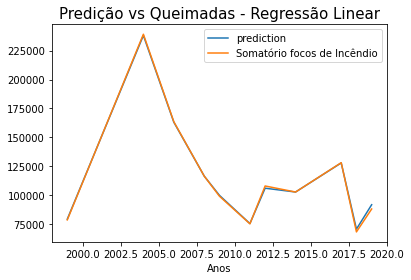

In [140]:
df_regressao_linear[['prediction','Somatório focos de Incêndio']].plot().set_title("Predição vs Queimadas - Regressão Linear", fontsize = 15)

<AxesSubplot:xlabel='Somatório focos de Incêndio', ylabel='prediction'>

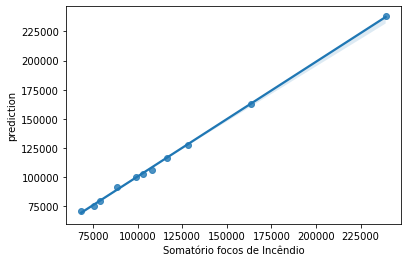

In [141]:
#Para melhor análise da precisão
sns.regplot(x = df_regressao_linear['Somatório focos de Incêndio'], 
            y = df_regressao_linear['prediction'], 
            
            data = df_regressao_linear)

In [142]:
#Métricas de Performance
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [143]:
#Verificar o MAE - Curso #Erro Percentual Médio Absoluto (MAPE)
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp
#Nos dados de teste, a cada predição que fizer o modelo pode estar 0.011% errado

,DataFrame,MAE,MAPE
0,test,1035.326274,0.011202


In [144]:
######################Modelo de Rede Neural#########################################################
#Define classificador utilizado e treina
classifier_neural = MLPRegressor()
classifier_neural.fit(xTrain, yTrain)

#Faz predicao com o modelo de teste
yPred = classifier_neural.predict(xTest)



In [148]:
####Validação Cruzada para a Rede Neural
Neural_resultado = cross_val_score(classifier_neural, xTrain, yTrain, cv = kfold)
print("Neural Mean (R^2): {0}\n".format(Neural_resultado.mean()))

Neural Mean (R^2): 0.9977725029690792



In [149]:
#Verificar a precisão do modelo
prediction_relative_error_neural = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [150]:
#Criação de novo dataframe para análise dos valores de predição para rede neural, erro e o valor que será previsto
df_teste_neural = xTest.copy()
df_teste_neural['prediction'] = yPred
df_teste_neural['relative_error'] = prediction_relative_error_neural
df_teste_neural['Somatório focos de Incêndio'] = yTest
df_teste_neural

,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,RO - qtd. focos de incêndio,RR - qtd. focos de incêndio,TO - qtd. focos de incêndio,AL - qtd. focos de incêndio,...,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,PI - qtd. focos de incêndio,SC - qtd. focos de incêndio,SE - qtd. focos de incêndio,prediction,relative_error,Somatório focos de Incêndio
Anos,,,,,,,,,,,,,,,,,,,,,
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.000,10253.0,2383.0,281.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,65474.220712,4.200423,68345.000
2008,6701.0,7822.0,5699.0,2153.0,18602.0,50138.000,11549.0,1950.0,528.0,277.0,...,1059.486,2138.339,1189.0,1217.000,547.0,1193.000,243.0,120873.239474,3.756582,116496.936
2012,9114.0,6919.0,4720.0,2518.0,16133.0,39506.000,8312.0,1376.0,406.0,352.0,...,2181.976,2879.189,1089.0,2219.000,1000.0,2159.000,231.0,108912.640839,0.814974,108032.206
2011,5028.0,4976.0,3191.0,1396.0,9103.0,29843.000,6078.0,1475.0,376.0,232.0,...,1808.872,1766.926,1589.0,2567.000,926.0,1400.175,173.0,76942.754367,2.144957,75327.022
1999,1048.0,4136.0,347.0,101.0,28538.0,23915.000,7121.0,220.0,869.0,172.0,...,1910.096,997.239,463.0,1030.110,364.0,4249.211,93.0,81298.591654,3.242550,78745.238
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.000,11206.0,4775.0,247.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,86355.229419,2.019369,88135.000
2009,9280.0,6664.0,3511.0,2456.0,9970.0,44627.000,5396.0,2359.0,382.0,325.0,...,2682.000,2099.323,1569.0,1721.057,1330.0,1165.000,206.0,102164.974215,3.024007,99166.182
2017,11685.0,5896.0,6295.0,1946.0,18143.0,52822.706,11298.0,1565.0,841.0,121.0,...,1581.131,1581.901,522.0,4243.000,2354.0,2540.868,75.0,131069.852774,2.277332,128151.420
2006,11697.0,7885.0,6198.0,1665.0,32745.0,59148.000,25699.0,2189.0,504.0,161.0,...,1294.463,2463.780,1268.0,2493.000,1855.0,2209.000,147.0,166496.098613,1.813483,163530.501


In [152]:
#Ordenar valores anos do nova dataframe
df_teste_neural = df_teste_neural.sort_values(by='Anos')

Text(0.5, 1.0, 'Predição vs Incêndios')

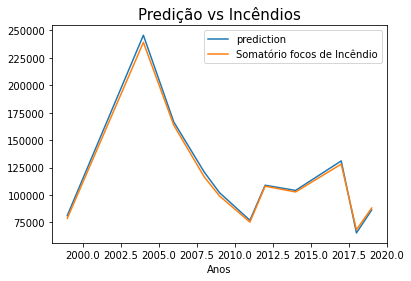

In [153]:
df_teste_neural[['prediction','Somatório focos de Incêndio']].plot().set_title("Predição vs Incêndios", fontsize = 15)

In [154]:
#Métricas de Performance - Para rede neural
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [155]:
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp

,DataFrame,MAE,MAPE
0,test,2802.261283,0.024867


In [ ]:
###########################MODELO SVM###########################

In [185]:
#criando uma instância para o SVC
clf = svm.SVC()

In [186]:
#Necessário alterar o tipo do dado
yTrain = yTrain.astype(int)

In [187]:
#treinando o modelo
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)



In [189]:
#Verificar a precisão do modelo
prediction_relative_error_svm = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [190]:
df_teste_SVM = xTest.copy()
df_teste_SVM['prediction'] = yPred
df_teste_SVM['relative error'] = prediction_relative_error_svm
df_teste_SVM['Somatório de qtd. de Incêndios'] = yTest
df_teste_SVM

,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,RO - qtd. focos de incêndio,RR - qtd. focos de incêndio,TO - qtd. focos de incêndio,AL - qtd. focos de incêndio,...,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,PI - qtd. focos de incêndio,SC - qtd. focos de incêndio,SE - qtd. focos de incêndio,prediction,relative error,Somatório de qtd. de Incêndios
Anos,,,,,,,,,,,,,,,,,,,,,
2018,11446.0,2449.0,6626.0,1206.0,11621.0,22080.000,10253.0,2383.0,281.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,76897,12.512986,68345.000
2008,6701.0,7822.0,5699.0,2153.0,18602.0,50138.000,11549.0,1950.0,528.0,277.0,...,1059.486,2138.339,1189.0,1217.000,547.0,1193.000,243.0,125608,7.820861,116496.936
2012,9114.0,6919.0,4720.0,2518.0,16133.0,39506.000,8312.0,1376.0,406.0,352.0,...,2181.976,2879.189,1089.0,2219.000,1000.0,2159.000,231.0,111597,3.299751,108032.206
2011,5028.0,4976.0,3191.0,1396.0,9103.0,29843.000,6078.0,1475.0,376.0,232.0,...,1808.872,1766.926,1589.0,2567.000,926.0,1400.175,173.0,76897,2.084216,75327.022
1999,1048.0,4136.0,347.0,101.0,28538.0,23915.000,7121.0,220.0,869.0,172.0,...,1910.096,997.239,463.0,1030.110,364.0,4249.211,93.0,85577,8.675778,78745.238
2019,12665.0,3989.0,6802.0,1272.0,17479.0,29700.000,11206.0,4775.0,247.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.000,0.0,111597,26.620525,88135.000
2009,9280.0,6664.0,3511.0,2456.0,9970.0,44627.000,5396.0,2359.0,382.0,325.0,...,2682.000,2099.323,1569.0,1721.057,1330.0,1165.000,206.0,125608,26.664148,99166.182
2017,11685.0,5896.0,6295.0,1946.0,18143.0,52822.706,11298.0,1565.0,841.0,121.0,...,1581.131,1581.901,522.0,4243.000,2354.0,2540.868,75.0,125608,1.984699,128151.420
2006,11697.0,7885.0,6198.0,1665.0,32745.0,59148.000,25699.0,2189.0,504.0,161.0,...,1294.463,2463.780,1268.0,2493.000,1855.0,2209.000,147.0,153418,6.183862,163530.501


In [191]:
df_teste_SVM = df_teste_SVM.sort_values(by='Anos')

Text(0.5, 1.0, 'Somatório de qtd. de Incêndios')

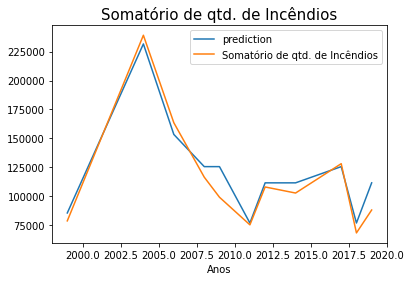

In [192]:
df_teste_SVM[['prediction','Somatório de qtd. de Incêndios']].plot().set_title("Somatório de qtd. de Incêndios", fontsize = 15)

<AxesSubplot:xlabel='Somatório de qtd. de Incêndios', ylabel='prediction'>

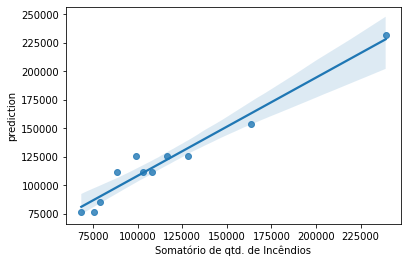

In [193]:
#Para melhor análise da precisão
sns.regplot(x = df_teste_SVM['Somatório de qtd. de Incêndios'], 
            y = df_teste_SVM['prediction'], 
            
            data = df_teste_SVM)

In [194]:
#Métricas de Performance - Para SVM
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [195]:
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp

,DataFrame,MAE,MAPE
0,test,9863.913636,0.097775
